# Demand dynamics of Bike Sharing system

## Introduction

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. Owing to such a harrowing situation, the company has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

## Problem Statement

BoomBikes wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal

We need to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## About the Dataset
The company has provided the booking data of their bikes on a daily basis for the year 2018 and 2019. The data is provided in the form of a CSV file (**day.csv**). The company has also provided the data dictionary for the variables which are part of the historical data (**Readme.txt**) 

### Data Specifications
The data has list of all the lthe booking data for the year 2018 and 201. Some of the specifications are as follows:
- There are **16 columns** in the dataset.
- There are **729 records** in the dataset. 
- The target variable here is the **cnt** column.
- cnt is a continuous variable and it represents the total number of bikes booked for a given day

### Importing Python packages 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from warnings import filterwarnings
import datetime as dt
from IPython.display import display

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)
filterwarnings('ignore')

### Loading the dataset

In [4]:
source_folder = "E:\\UpGrad\\git\\BikeSharing"
data = pd.read_csv(join(source_folder,"day.csv"))
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Exploratory Data Analysis

### Missing values and Anomalies

After analyzing the dataset (***data.info()***), its found that there are no NULL or missing values. Also, after analyzing the output of ***data.describe()***, its found that there are no anomalies in any of the columns.

### Visualizing the continuous dataset

We will perform a bi-variate analysis of the continuous variables and the *cnt* target variable. For this we will use the ***pair plot***.

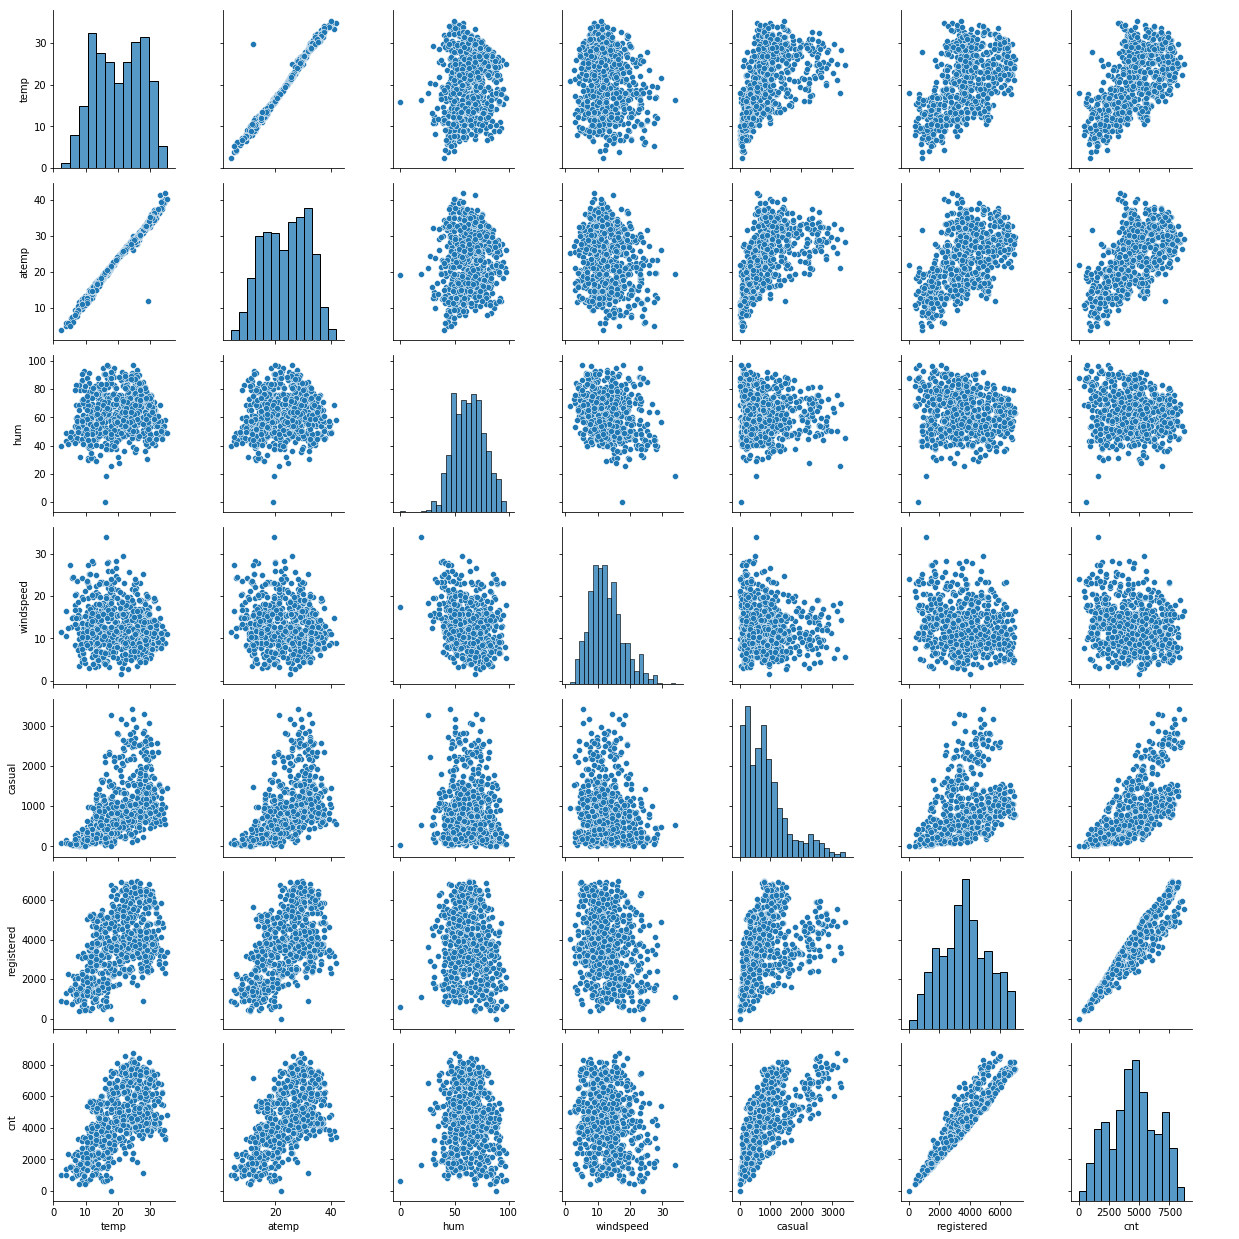

In [7]:
cont_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
cont_data = data.loc[:,cont_cols]
sns.pairplot(cont_data)

### Bivariate analysis of the continuous variables

**atemp vs temp**: We see that the *atemp* and the *temp* variables are highly co-related. This is logical as temperature and temperature felt are positively co-related. Hence we can remove either of these variables. It would make more sense to retain atemp as thats what matters for the customers in deciding whether they need to go outdoor or not.

**casual/registered vs cnt**: We see that the sum of *casual* and *registered* will yield *cnt*. Hence both these cols are highly corelated with the target column 'cnt'. It would make lot more sense to remove both casual and registered columns. One keen observation here is that *casual* values is slightly distorted with respected to *cnt*. We can try to create a new ***derived column: casualRegisteredRatio*** to capture the relation between casual and registered columns and its affect on cnt variable.

**atemp vs cnt**: We see that the as the temperature felt increases the, number of bikes rented also increases. This reveals a postive correlation between atemp and cnt.

### Transforming and Visualizing the categorical dataset

We will perform a bi-variate analysis of the categorical variables and the cnt target variable. For this we will use the box plot.

Before we go ahead visualizing the categorical dataset, we observe that the some of the categorical are cardinal and we need to convert them into nominal categorical variables.

Below are the list of the columns and their current cardinal and proposed nominal values:
- **Season**
    - Current values (Cardinal): 1, 2, 3, 4
    - Proposed values (Nominal): "spring", "summer", "fall", "winter"
- **mnth**
    - Current values (Cardinal): 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
    - Proposed values (Nominal): "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"
- **weekday**
    - Current values (Cardinal): 0, 1, 2, 3, 4, 5, 6
    - Proposed values (Nominal): "Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"
- **weathersit**
    - Current values (Cardinal): 1, 2, 3, 4
    - Proposed values (Nominal): "Clear", "Misty", "Light", "Heavy"

In [9]:
# Data Transformation for season
season_dict={1:"spring",2:"summer",3:"fall",4:"winter"}
data["season"] = data["season"].apply(lambda x: season_dict[x])

# Data Transformation for month
month_dict={1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"}
data["mnth"] = data["mnth"].apply(lambda x: month_dict[x])

# Data Transformation for weekday
weekday_dict={0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"}
data["weekday"] = data["weekday"].apply(lambda x: weekday_dict[x])

# Data Transformation for weathersit
weather_dict={1:"Clear",2:"Misty",3:"Light",4:"Heavy"}
data["weathersit"] = data["weathersit"].apply(lambda x: weather_dict[x])

### Code for Box plot for categorical variables vs *cnt* variable

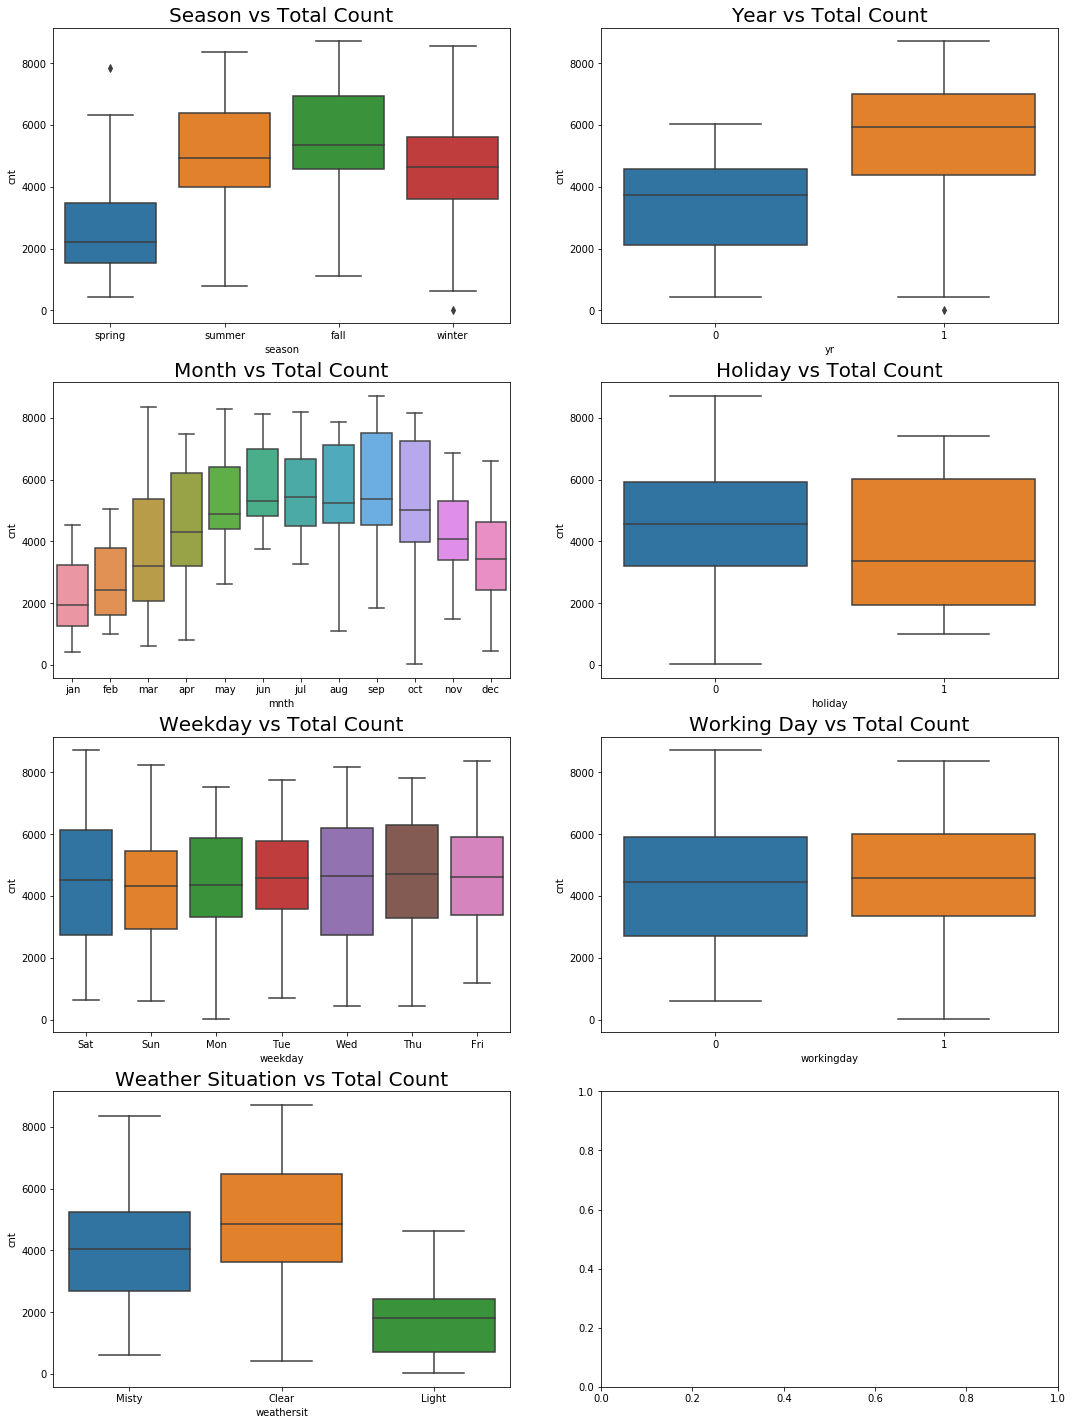

In [10]:
fig, axis = plt.subplots(4,2,figsize=(18, 25))
sns.boxplot(x="season", y="cnt", data=data,ax=axis[0,0])
axis[0,0].set_title("Season vs Total Count",fontsize='20')

sns.boxplot(x="yr", y="cnt", data=data,ax=axis[0,1])
axis[0,1].set_title("Year vs Total Count",fontsize='20')

sns.boxplot(x="mnth", y="cnt", data=data,ax=axis[1,0])
axis[1,0].set_title("Month vs Total Count",fontsize='20')

sns.boxplot(x="holiday", y="cnt", data=data,ax=axis[1,1])
axis[1,1].set_title("Holiday vs Total Count",fontsize='20')

sns.boxplot(x="weekday", y="cnt", data=data,ax=axis[2,0])
axis[2,0].set_title("Weekday vs Total Count",fontsize='20')

sns.boxplot(x="workingday", y="cnt", data=data,ax=axis[2,1])
axis[2,1].set_title("Working Day vs Total Count",fontsize='20')

sns.boxplot(x="weathersit", y="cnt", data=data,ax=axis[3,0])
axis[3,0].set_title("Weather Situation vs Total Count",fontsize='20')

plt.show()

### Bivariate analysis of the continuous variables

**Season vs Total Count**: During the fall and summer the total count increases when compared to winter. Surprisingly, during spring the count has decreased compared to any other season. This is an observation which needs further investigation.

**Year vs Total Count**: Its observed the sales increase as year passes by. Hence as per the previous data, there is a positive for booking as year pass by.

**Month vs Total Count**: The count during the summer and fall seasons are very high compared to winter. Also, during the onset of spring and end of fall, the spread is high. Since there is a transformation of temparature during this period, the variance in booking is also on the higher side

**Holiday vs Total Count**: Seems like during the holidays, the booking cout slightly dips. Also spread is higher between the 25th and 75th quartile. Seems like holidays might not have a major impact on renting bikes.

**Weather Situation vs Total Count**: Its evident that bike sales increase during clear weather and decrease when there is a light rain or snow

## Data Preperation

We will perform some of the data preperation steps of the *data* dataset. Some of the data wrangling activites are as below:
- ***Removing instant*** column, as it doesnt have any relevence.
- It seems temp and atemp are highly correlated as they both have to do with the temperature. Since atemp is more apt for a customer we will ***retain atemp and remove temp***
- Convert dteday to date time format and subsequently to ordinal data for the linear regression model to consume.
- Create a derived ***column*** of ratio of casual users:registered users.
- Create ***dummy variables*** for *season, weathersit, mnth and workingday* column
- Remove the rediundent season, mnth, weekday, weathersit columns

In [11]:
# Removing instant column as it doesnt have any relevence
data = data.loc[:,~data.columns.isin(["instant"])]

# Remove temp column
data = data.loc[:,~data.columns.isin(["temp"])]

# Convert dteday to date time format and to ordinal data
data["dteday"] = pd.to_datetime(data["dteday"],format="%d-%m-%Y")
data["dteday"]=data["dteday"].map(dt.datetime.toordinal)

# create a derived column of casual:registered users and removing casual and registered column
data["casualRegRatio"] = round(data["casual"]/data["registered"],2)
data = data.loc[:,~data.columns.isin(["registered","casual"])]

# Create dummy variables for season
temp= pd.get_dummies(data["season"],drop_first=True)
data = pd.concat([data,temp],axis=1)

# Create dummy variables for month
temp= pd.get_dummies(data["mnth"],drop_first=True)
data = pd.concat([data,temp],axis=1)

# Create dummy variables for weekday
temp= pd.get_dummies(data["weekday"],drop_first=True)
data = pd.concat([data,temp],axis=1)

# Create dummy variables for weathersit
temp= pd.get_dummies(data["weathersit"],drop_first=True)
data = pd.concat([data,temp],axis=1)

#Remove season, mnth, weekday, weathersit columns
data = data.loc[:,~data.columns.isin(["season","mnth","weekday","weathersit"])]

In [12]:
data.head()

,dteday,yr,holiday,workingday,atemp,hum,windspeed,cnt,casualRegRatio,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,Light,Misty
0,736695,0,0,0,18.18125,80.5833,10.749882,985,0.51,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,736696,0,0,0,17.68695,69.6087,16.652113,801,0.20,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,736697,0,0,1,9.47025,43.7273,16.636703,1349,0.10,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,736698,0,0,1,10.60610,59.0435,10.739832,1562,0.07,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,736699,0,0,1,11.46350,43.6957,12.522300,1600,0.05,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
#Creating a backup of the data 
data_new = data.copy()

After performing all the required data transformation, we have a dataset of **729 rows and 31 columns**. 

## Splitting the data into train and test sets

For splitting the data into test and train datasets, we will use the sklearn library. We will split the train test data in the ratio 70:30.

In [63]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

train_x, test_x = train_test_split(data_new, train_size=0.7, test_size=0.3, random_state=10)

### Rescaling the continuous data

We see that columns atemp, hum, windspeed, casual, registered and cnt have varied ranges and might cause the co-efficients values to vary a lot. 
To avoid this we will rescale these variables. We will use the Min-Max scaler function 

In [64]:
# Code to scale the 'atemp', 'hum', 'windspeed','cnt','dteday' columns using the MinMaxScaler function of sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cont_cols = ['atemp', 'hum', 'windspeed','cnt','dteday']
train_x[cont_cols] = scaler.fit_transform(train_x[cont_cols])

train_x.describe()

,dteday,yr,holiday,workingday,atemp,hum,windspeed,cnt,casualRegRatio,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,Light,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507173,0.507843,0.033333,0.688235,0.497849,0.564620,0.343339,0.492266,0.233569,0.247059,0.256863,0.260784,0.076471,0.094118,0.076471,0.086275,0.068627,0.072549,0.084314,0.086275,0.092157,0.084314,0.090196,0.147059,0.147059,0.131373,0.137255,0.149020,0.152941,0.033333,0.345098
std,0.292271,0.500429,0.179682,0.463669,0.213742,0.183343,0.162447,0.235984,0.189121,0.431725,0.437332,0.439494,0.266010,0.292279,0.266010,0.281045,0.253068,0.259649,0.278131,0.281045,0.289531,0.278131,0.286744,0.354512,0.354512,0.338139,0.344454,0.356457,0.360284,0.179682,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252743,0.000000,0.000000,0.000000,0.319432,0.427182,0.227237,0.326754,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507545,1.000000,0.000000,1.000000,0.502990,0.563897,0.323711,0.490945,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.759259,1.000000,0.000000,1.000000,0.672738,0.698806,0.434281,0.675812,0.260000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.040000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualizing the correlation of all the continuous variables

We will try to understand the correlation of each of the continuous variable through the heat map. This will help us get a first hand understanding of the relevence of certain independent columns of target variables

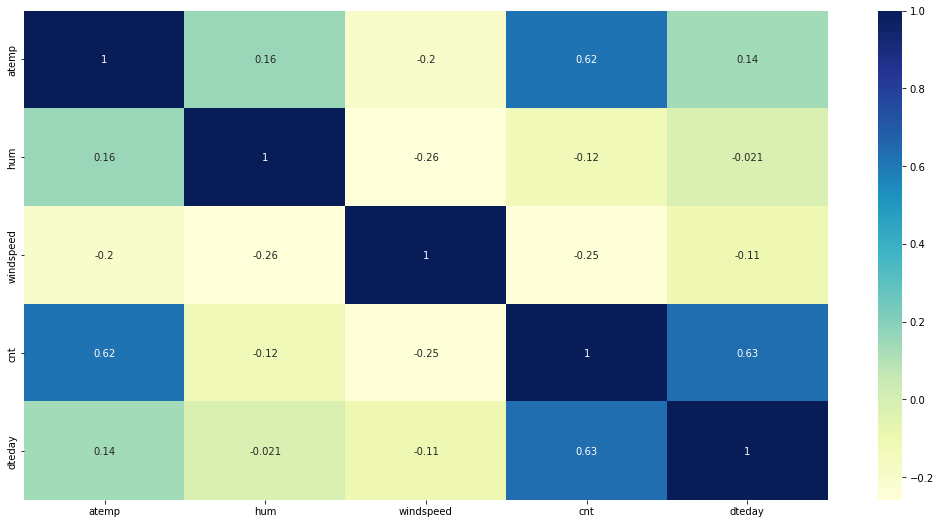

In [20]:
# Code for generating the heat map of the correlation between all the continuous variables

plt.figure(figsize = (18, 9))
sns.heatmap(train_x[cont_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

### Deviding into Predictor and Target variable for train dataset

In [22]:
# code for seperating the target variable from the train dataset
train_y = train_x.pop('cnt')

### Model Building Stratergy

There are 3 ways of building the model.
- Use the Recursive Feature Elimination (RFE) algorithm.
- Building an initial model with all variables and then update models by trimming the least significant variables
- Building an initial model with the most correlated single variable and then update models by adding the variables 

We **will take the second approach** wherein we will build an initial model with all the variables and then record the adjusted R-Square score (To factor in for the number of variables). We will then eliminate the most inisignificant variables as per their ***p-values*** and then their ***Varience Inflation Factor (VIF)***. We will set the cut-off of VIF at 5 i.e anything more than 5 will be trimmed. Everytime we will remove a variable we will rebuild the model and re-evaluate their p scores and VIF. 

The reason why we will not use *RFE* algorithm directly is because here we have less number of columns and it would be more useful if we understand the relevence of each column on the final model as and when we eliminate the columns step by step.

We will use the **statsmodel** library to build and evaluate the models.

### Functions for Building the models and Display the stats and Varience Inflation factor (VIF)

Since we have to have multiple iteration of model building and VIF, for convenience we will create couple of utility functios- First one to build the models and display the co-efficients, and the second one to display the summary and the VIF.

In [35]:
# Function to build the model and display the params
def build_model(train_x,train_y):
    train_x_lr = sm.add_constant(train_x)
    lr1 = sm.OLS(train_y, train_x_lr).fit()
    display("Model Successfully built")
    display(lr1.params)
    return lr1

# Function to display the summary and the Varience Inflation factor
def display_summary_vif(model,train_x):
    vif = pd.DataFrame()
    vif['Features'] = train_x.columns
    vif['VIF'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(model.summary())
    display(vif)

In [27]:
lr_model = build_model(train_x,train_y)
display(lr_model.summary())

'Model Successfully built'

const             0.245992
dteday           -0.377743
yr                0.441991
holiday           0.007669
workingday        0.124729
atemp             0.408616
hum              -0.142958
windspeed        -0.144450
casualRegRatio    0.168415
spring           -0.106438
summer           -0.005698
winter            0.110046
aug               0.067945
dec               0.060636
feb              -0.053100
jan              -0.088005
jul              -0.003890
jun               0.043299
mar               0.000462
may               0.047731
nov               0.018900
oct               0.086365
sep               0.143496
Mon              -0.025124
Sat               0.080954
Sun               0.032639
Thu              -0.000096
Tue              -0.010368
Wed              -0.000453
Light            -0.193732
Misty            -0.054350
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          8.81e-186
Time:                        16:29:48   Log-Likelihood:                 517.57
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     480   BIC:                            -848.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2460      0.051      4.813      0.000       0.146       0.346
dteday            -0.3777      0.334     -1.132      0.258      -1.034       0.278
yr                 0.4420      0.167      2.641      0.009       0.113       0.771
holiday            0.0077      0.024      0.317      0.752      -0.040       0.055
workingday         0.1247      0.016      7.667      0.000       0.093       0.157
atemp              0.4086      0.048      8.563      0.000       0.315       0.502
hum               -0.1430      0.034     -4.200      0.000      -0.210      -0.076
windspeed         -0.1444      0.028     -5.143      0.000      -0.200      -0.089
casualRegRatio     0.1684      0.041      4.151      0.000       0.089       0.248
spring            -0.1064      0.030     -3.565      0.000      -0.165      -0.048
summer            -0.0057      0.027     -0.209      0.835      -0.059       0.048
winter             0.1100      0.026      4.156      0.000       0.058       0.162
aug                0.0679      0.067      1.012      0.312      -0.064       0.200
dec                0.0606      0.118      0.512      0.609      -0.172       0.293
feb               -0.0531      0.043     -1.247      0.213      -0.137       0.031
jan               -0.0880      0.053     -1.664      0.097      -0.192       0.016
jul               -0.0039      0.057     -0.069      0.945      -0.115       0.107
jun                0.0433      0.037      1.155      0.249      -0.030       0.117
mar                0.0005      0.028      0.016      0.987      -0.055       0.056
may                0.0477      0.024      1.949      0.052      -0.000       0.096
nov                0.0189      0.106      0.178      0.859      -0.190       0.228
oct                0.0864      0.092      0.934      0.351      -0.095       0.268
sep                0.1435      0.078      1.834      0.067      -0.010       0.297
Mon               -0.0251      0.015     -1.622      0.105      -0.056       0.005
Sat                0.0810      0.017      4.749      0.000       0.047       0.114
Sun                0.0326      0.017      1.881      0.061      -0.001       0.067
Thu            -9.598e-05      0.016     -0.006      0.995      -0.031       0.031
Tue               -0.0104      0.015     -0.679      0.497      -0.040       0.020
Wed               -0.0005      0.015     -0.030      0.976      -0.031       0.030
Light             -0.1937      0.028     -6.955      0.000      -0.248      -0.139
Misty             -0.0544      0.011     -4.903      0.000      -0.076      -0.033
==============================================================================
Omnibus:                      108.855   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.472
Skew:                   

### Analysis of model summary: Part 1

As part of removing the insignificant columns, we will first target the columns with ***P values greater than 0.05***. As per that criteria, below are the list of columns which we can remove:
- dteday
- holiday
- summer
- aug
- dec
- feb
- jan
- jul
- jun
- mar
- may
- nov
- oct
- sep
- Mon
- Sun
- Thu
- Tue
- Wed

After removing the above 19 columns, we are left with **11 columns** as the independent variables.


In [29]:
train_x_1 = train_x.drop(['dteday','holiday', 'summer','aug', 'dec', 'feb', 'jan', 'mar','jul','jun','may','nov','oct', 'sep', 'Mon', 'Tue', 'Thu', 'Wed','Sun'],1)

In [43]:
lr_model_2 = build_model(train_x_1,train_y)
display_summary_vif(lr_model_2,train_x_1)

'Model Successfully built'

const             0.166008
yr                0.256294
workingday        0.101722
atemp             0.444321
hum              -0.118833
windspeed        -0.135515
casualRegRatio    0.200021
spring           -0.124074
winter            0.066472
Sat               0.058103
Light            -0.188124
Misty            -0.049733
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.2
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.12e-187
Time:                        17:16:42   Log-Likelihood:                 474.72
No. Observations:                 510   AIC:                            -925.4
Df Residuals:                     498   BIC:                            -874.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1660      0.035      4.677      0.000       0.096       0.236
yr                 0.2563      0.009     28.845      0.000       0.239       0.274
workingday         0.1017      0.017      6.113      0.000       0.069       0.134
atemp              0.4443      0.033     13.488      0.000       0.380       0.509
hum               -0.1188      0.034     -3.465      0.001      -0.186      -0.051
windspeed         -0.1355      0.029     -4.652      0.000      -0.193      -0.078
casualRegRatio     0.2000      0.040      5.046      0.000       0.122       0.278
spring            -0.1241      0.016     -7.847      0.000      -0.155      -0.093
winter             0.0665      0.013      5.204      0.000       0.041       0.092
Sat                0.0581      0.015      3.776      0.000       0.028       0.088
Light             -0.1881      0.029     -6.465      0.000      -0.245      -0.131
Misty             -0.0497      0.012     -4.274      0.000      -0.073      -0.027
==============================================================================
Omnibus:                      117.216   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.626
Skew:                          -1.083   Prob(JB):                     7.29e-77
Kurtosis:                       6.437   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
3,hum,17.17
2,atemp,15.66
1,workingday,7.26
5,casualRegRatio,5.91
4,windspeed,4.80
6,spring,2.50
10,Misty,2.48
0,yr,2.08
7,winter,1.90
8,Sat,1.83


### Analysis of model summary: Part 2
From the summary report, it seems all the columns have P-Value less than 0.05. Now that we have met the criteria for P-Value, we will analyze the VIF. We see that ***hum*** column has ***VIF value greater than 5***. We will first remove this column, re-build the model, and then recalculate the VIF

In [44]:
# Code to drop hum column
train_x_2 = train_x_1.drop(['hum'],1)

In [45]:
# Code to create a new model and display stats
lr_model_3 = build_model(train_x_2,train_y)
display_summary_vif(lr_model_3,train_x_2)

'Model Successfully built'

const             0.105426
yr                0.262296
workingday        0.107697
atemp             0.415041
windspeed        -0.103849
casualRegRatio    0.209286
spring           -0.127177
winter            0.060867
Sat               0.060482
Light            -0.240252
Misty            -0.074414
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.7
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          2.57e-186
Time:                        17:16:56   Log-Likelihood:                 468.64
No. Observations:                 510   AIC:                            -915.3
Df Residuals:                     499   BIC:                            -868.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1054      0.031      3.376      0.001       0.044       0.167
yr                 0.2623      0.009     29.771      0.000       0.245       0.280
workingday         0.1077      0.017      6.437      0.000       0.075       0.141
atemp              0.4150      0.032     12.894      0.000       0.352       0.478
windspeed         -0.1038      0.028     -3.714      0.000      -0.159      -0.049
casualRegRatio     0.2093      0.040      5.234      0.000       0.131       0.288
spring            -0.1272      0.016     -7.969      0.000      -0.159      -0.096
winter             0.0609      0.013      4.752      0.000       0.036       0.086
Sat                0.0605      0.016      3.892      0.000       0.030       0.091
Light             -0.2403      0.025     -9.539      0.000      -0.290      -0.191
Misty             -0.0744      0.009     -8.000      0.000      -0.093      -0.056
==============================================================================
Omnibus:                      116.514   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.024
Skew:                          -1.077   Prob(JB):                     2.68e-76
Kurtosis:                       6.427   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,atemp,11.73
1,workingday,6.87
4,casualRegRatio,5.61
3,windspeed,4.77
5,spring,2.08
0,yr,2.06
7,Sat,1.82
6,winter,1.55
9,Misty,1.54
8,Light,1.12


### Analysis of model summary: Part 3

From the VIF analysis, we see that atemp has highest VIF. But as per our Exploratory analysis, we saw that atemp had a strong correlation with cnt. Also, its more *presentable* when we retain atemp column. We will try to remove a column which makes the model less presentable and has another category of it in the list of features i.e ***Misty***

In [46]:
# Code to drop Misty column
train_x_3 = train_x_2.drop(['Misty'],1)

# Code to create a new model and display stats
lr_model_4 = build_model(train_x_3,train_y)
display_summary_vif(lr_model_4,train_x_3)

'Model Successfully built'

const             0.057518
yr                0.263897
workingday        0.107812
atemp             0.437461
windspeed        -0.095849
casualRegRatio    0.229985
spring           -0.118249
winter            0.060376
Sat               0.056683
Light            -0.208029
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     238.1
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.74e-174
Time:                        17:17:13   Log-Likelihood:                 437.87
No. Observations:                 510   AIC:                            -855.7
Df Residuals:                     500   BIC:                            -813.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0575      0.033      1.768      0.078      -0.006       0.121
yr                 0.2639      0.009     28.234      0.000       0.246       0.282
workingday         0.1078      0.018      6.072      0.000       0.073       0.143
atemp              0.4375      0.034     12.856      0.000       0.371       0.504
windspeed         -0.0958      0.030     -3.232      0.001      -0.154      -0.038
casualRegRatio     0.2300      0.042      5.432      0.000       0.147       0.313
spring            -0.1182      0.017     -7.000      0.000      -0.151      -0.085
winter             0.0604      0.014      4.442      0.000       0.034       0.087
Sat                0.0567      0.016      3.439      0.001       0.024       0.089
Light             -0.2080      0.026     -7.886      0.000      -0.260      -0.156
==============================================================================
Omnibus:                      111.826   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.558
Skew:                          -1.090   Prob(JB):                     5.95e-63
Kurtosis:                       5.955   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,atemp,11.73
1,workingday,6.74
4,casualRegRatio,5.60
3,windspeed,4.76
5,spring,2.07
0,yr,2.06
7,Sat,1.81
6,winter,1.52
8,Light,1.10


### Analysis of model summary: Part 4

From the VIF analysis, we see that atemp still has highest VIF.  We will try to remove the derived column ***windspeed***. We see that that the ***Adjusted R-Squared value is 0.807*** 

In [47]:
# Code to drop windspeed column
train_x_4 = train_x_3.drop(['windspeed'],1)

# Code to create a new model and display stats
lr_model_5 = build_model(train_x_4,train_y)
display_summary_vif(lr_model_5,train_x_4)

'Model Successfully built'

const             0.009215
yr                0.263947
workingday        0.113305
atemp             0.450848
casualRegRatio    0.244068
spring           -0.117162
winter            0.067626
Sat               0.054939
Light            -0.216059
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     261.6
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.80e-173
Time:                        17:18:23   Log-Likelihood:                 432.60
No. Observations:                 510   AIC:                            -847.2
Df Residuals:                     501   BIC:                            -809.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0092      0.029      0.316      0.752      -0.048       0.067
yr                 0.2639      0.009     27.977      0.000       0.245       0.282
workingday         0.1133      0.018      6.352      0.000       0.078       0.148
atemp              0.4508      0.034     13.225      0.000       0.384       0.518
casualRegRatio     0.2441      0.043      5.741      0.000       0.161       0.328
spring            -0.1172      0.017     -6.872      0.000      -0.151      -0.084
winter             0.0676      0.014      4.998      0.000       0.041       0.094
Sat                0.0549      0.017      3.304      0.001       0.022       0.088
Light             -0.2161      0.027     -8.150      0.000      -0.268      -0.164
==============================================================================
Omnibus:                      109.320   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.491
Skew:                          -1.084   Prob(JB):                     8.22e-59
Kurtosis:                       5.808   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,atemp,11.44
1,workingday,6.34
3,casualRegRatio,5.42
0,yr,2.04
4,spring,1.78
6,Sat,1.77
5,winter,1.49
7,Light,1.07


### Analysis of model summary: Part 5
From the summary, we see that that the ***Adjusted R-Squared value is 0.804***. Hence there is no much reduction in Adjusted R-Squared value. 
From the VIF analysis, we see that atemp still has value > 5. We will try to remove the derived column ***winter***. 


In [48]:
# Code to drop winter column
train_x_5 = train_x_4.drop(['winter'],1)

# Code to create a new model and display stats
lr_model_6 = build_model(train_x_5,train_y)
display_summary_vif(lr_model_6,train_x_5)

'Model Successfully built'

const             0.093111
yr                0.266797
workingday        0.101474
atemp             0.372698
casualRegRatio    0.209778
spring           -0.167926
Sat               0.053071
Light            -0.211059
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     282.0
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.96e-169
Time:                        17:19:44   Log-Likelihood:                 420.19
No. Observations:                 510   AIC:                            -824.4
Df Residuals:                     502   BIC:                            -790.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0931      0.024      3.815      0.000       0.045       0.141
yr                 0.2668      0.010     27.677      0.000       0.248       0.286
workingday         0.1015      0.018      5.607      0.000       0.066       0.137
atemp              0.3727      0.031     12.019      0.000       0.312       0.434
casualRegRatio     0.2098      0.043      4.885      0.000       0.125       0.294
spring            -0.1679      0.014    -11.982      0.000      -0.195      -0.140
Sat                0.0531      0.017      3.119      0.002       0.020       0.087
Light             -0.2111      0.027     -7.783      0.000      -0.264      -0.158
==============================================================================
Omnibus:                       88.159   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.602
Skew:                          -0.947   Prob(JB):                     3.68e-40
Kurtosis:                       5.226   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,atemp,10.88
1,workingday,5.58
3,casualRegRatio,5.17
0,yr,1.96
5,Sat,1.73
4,spring,1.57
6,Light,1.05


### Analysis of model summary: Part 6
From the summary, we see that that the ***Adjusted R-Squared value is 0.794***. Hence there is no much reduction in Adjusted R-Squared value. 
From the VIF analysis, we see that atemp still has value > 5. We will try to remove the derived column ***Sat***. 

In [52]:
# Code to drop Sat column
train_x_6 = train_x_5.drop(['Sat'],1)

# Code to create a new model and display stats
lr_model_7 = build_model(train_x_6,train_y)
display_summary_vif(lr_model_7,train_x_6)

'Model Successfully built'

const             0.115710
yr                0.267139
workingday        0.077749
atemp             0.372780
casualRegRatio    0.214373
spring           -0.167278
Light            -0.208486
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.8
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.28e-168
Time:                        17:26:10   Log-Likelihood:                 415.30
No. Observations:                 510   AIC:                            -816.6
Df Residuals:                     503   BIC:                            -787.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1157      0.024      4.922      0.000       0.070       0.162
yr                 0.2671      0.010     27.477      0.000       0.248       0.286
workingday         0.0777      0.017      4.694      0.000       0.045       0.110
atemp              0.3728      0.031     11.919      0.000       0.311       0.434
casualRegRatio     0.2144      0.043      4.952      0.000       0.129       0.299
spring            -0.1673      0.014    -11.835      0.000      -0.195      -0.140
Light             -0.2085      0.027     -7.626      0.000      -0.262      -0.155
==============================================================================
Omnibus:                       84.805   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.970
Skew:                          -0.907   Prob(JB):                     2.26e-39
Kurtosis:                       5.255   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,atemp,10.71
1,workingday,5.04
3,casualRegRatio,4.85
0,yr,1.94
4,spring,1.50
5,Light,1.04


### Analysis of model summary: Part 7
From the summary, we see that that the ***Adjusted R-Squared value is 0.791***. Hence there is no much reduction in Adjusted R-Squared value. 
From the VIF analysis, we see that atemp still has value > 5. We will try to remove the derived column ***workingday***. 

In [54]:
# Code to drop casualRegRatio column
train_x_7 = train_x_6.drop(['workingday'],1)

# Code to create a new model and display stats
lr_model_8 = build_model(train_x_7,train_y)
display_summary_vif(lr_model_8,train_x_7)

'Model Successfully built'

const             0.184672
yr                0.261637
atemp             0.423662
casualRegRatio    0.055743
spring           -0.169607
Light            -0.219391
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     366.4
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          2.98e-165
Time:                        17:28:25   Log-Likelihood:                 404.37
No. Observations:                 510   AIC:                            -796.7
Df Residuals:                     504   BIC:                            -771.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1847      0.019      9.859      0.000       0.148       0.221
yr                 0.2616      0.010     26.561      0.000       0.242       0.281
atemp              0.4237      0.030     14.148      0.000       0.365       0.482
casualRegRatio     0.0557      0.028      2.019      0.044       0.001       0.110
spring            -0.1696      0.014    -11.764      0.000      -0.198      -0.141
Light             -0.2194      0.028     -7.891      0.000      -0.274      -0.165
==============================================================================
Omnibus:                       74.280   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.912
Skew:                          -0.850   Prob(JB):                     1.13e-30
Kurtosis:                       4.896   Cond. No.                         9.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
1,atemp,3.61
2,casualRegRatio,2.77
0,yr,1.93
3,spring,1.16
4,Light,1.03


### Analysis of model summary: Part 8
From the summary, we see that that the ***Adjusted R-Squared value is 0.782***. Hence there is no much reduction in Adjusted R-Squared value. 
From the summay analysis, we see that casualRegRatio  has value equal to 0.44. Though this is less than 0.05, we will try to remove the derived column ***casualRegRatio*** provided it doesnt drastically reduce our Adjusted R-Square. 

In [74]:
# Code to drop casualRegRatio column
train_x_8 = train_x_7.drop(['casualRegRatio'],1)

# Code to create a new model and display stats
lr_model_final = build_model(train_x_8,train_y)
display_summary_vif(lr_model_final,train_x_8)

'Model Successfully built'

const     0.192401
yr        0.259882
atemp     0.437302
spring   -0.170985
Light    -0.227425
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     454.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          9.97e-166
Time:                        18:02:54   Log-Likelihood:                 402.31
No. Observations:                 510   AIC:                            -794.6
Df Residuals:                     505   BIC:                            -773.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1924      0.018     10.461      0.000       0.156       0.229
yr             0.2599      0.010     26.406      0.000       0.241       0.279
atemp          0.4373      0.029     14.945      0.000       0.380       0.495
spring        -0.1710      0.014    -11.837      0.000      -0.199      -0.143
Light         -0.2274      0.028     -8.240      0.000      -0.282      -0.173
==============================================================================
Omnibus:                       66.174   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.846
Skew:                          -0.765   Prob(JB):                     1.28e-27
Kurtosis:                       4.867   Cond. No.                         9.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,yr,1.93
1,atemp,1.82
2,spring,1.15
3,Light,1.02


### Analysis of model summary: Final
From the summary, we see that that the ***Adjusted R-Squared value is 0.781***. The ***Prob (F-statistic) is 9.97e-166***, which is a infinitesimaly small number. Hence this model ***seems statistically significant***. 

**P value Analysis**: We see that all the columns have values **equal to zero**. Hence we are ***good with respect to P-Value analysis***. 

**VIF Analysis**: From the VIF analysis, we see that all the columns are less than 5. Hence we are ***good with respect to VIF analysis***.

## Residual Analysis of the train data

One of our major assumptions of linear regression is that the error terms are also normally distributed. Also, the other 2 assumptions are that the error terms are independent of each other and that are homoscedasticity(Have constant variance). 

- To validate whether this adheres to normality assumption, let us plot the histogram of the error terms and see what it looks like.
- To validate whether it adheres to homoscedasticity and error terms being independent of each other, we need to plot a scatter plot of the error terms and chech if its not creating any obvious pattern . This will validate that they are independent. To check for homoscedasticity, we need to see if the error terms are equally distributed around the mean value

Text(0.5, 0, 'Errors')

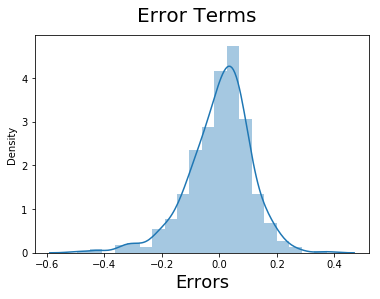

In [76]:
# Code to add the constant term and predict the train_x data
train_x_sm = sm.add_constant(train_x_8)
y_train_pred = lr_model_final.predict(train_x_sm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((train_y - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)          
plt.xlabel('Errors', fontsize = 18)

From the above graph, we see that the residual errors do adhere to a normal distribution and hence our model adheres to our assumption of have the normal distribution for error terms.

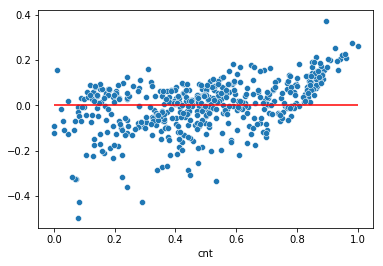

In [100]:
# Code to check the homoscedasticity and independence of error terms
fig = plt.figure()
sns.scatterplot(train_y, (train_y - y_train_pred))
plt.hlines(0,0,1,color='red')
plt.show()

From the above graph, we see that the error terms are independent of each other and they are homoscedastic.

## Predicting the test data using the final model

As a final validation of our model **lr_model_final**, we will apply this model on the test data which we had created initially. 

Before we apply the model, we need to first scale the test data using the same **scaler** model using which we had scaled the training data. *Hence we just need to transform the test data and not fit the test data*. 

In [65]:
test_x[cont_cols] = scaler.transform(test_x[cont_cols])
test_x.describe()

,dteday,yr,holiday,workingday,atemp,hum,windspeed,cnt,casualRegRatio,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,Light,Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.483918,0.484018,0.018265,0.671233,0.519348,0.553757,0.355143,0.493256,0.247626,0.246575,0.242009,0.200913,0.105023,0.063927,0.077626,0.082192,0.123288,0.105023,0.086758,0.082192,0.059361,0.086758,0.059361,0.136986,0.136986,0.173516,0.155251,0.127854,0.114155,0.018265,0.315068
std,0.282671,0.500889,0.134214,0.470841,0.235759,0.176766,0.153340,0.228832,0.196144,0.432005,0.429281,0.401601,0.307285,0.245183,0.268194,0.275286,0.329520,0.307285,0.282125,0.275286,0.236840,0.282125,0.236840,0.344621,0.344621,0.379560,0.362974,0.334692,0.318728,0.134214,0.465607
min,0.008230,0.000000,0.000000,0.000000,-0.030556,-0.240150,0.041051,-0.049378,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246914,0.000000,0.000000,0.000000,0.315942,0.420926,0.249358,0.337498,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.473251,0.000000,0.000000,1.000000,0.556768,0.556975,0.333354,0.510685,0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.727023,1.000000,0.000000,1.000000,0.725883,0.681310,0.437853,0.655137,0.305000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.998628,1.000000,1.000000,1.000000,0.950477,0.971686,0.864144,0.933961,1.030000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Once the data is scaled, we will seperate the target variable from the test dataset

In [66]:
# Code to seperate the target variable from the test dataset
test_y = test_x.pop('cnt')

Once the data is scaled and target variable is seperated, we need to add the constant variable to the test dataset. Once done, we will predict the test data using finalized model **lr_model_final**.

In [81]:
# Code to get the finalized predictor column names
test_cols = list(train_x_8.columns)

# Code to filter the finalzied predictor columns and add the constant column
test_x_fnl = test_x[test_cols]
test_x_fnl = sm.add_constant(test_x_fnl)

# Code to predict using the finalized model
test_y_pred = lr_model_final.predict(test_x_fnl)

## Model Evaluation

Now that we have predicted the test data, we will evaluate the model. We will implement two methodologies of veriifying the model:
- **Visual methodology**: Here we will plot the actual target variable data against the predicted target variable using the scatter plot and see that they are linearly distributed. If they are linearly distributed, then it mean that there is no much difference between actual and predicted values
- **Statistical Methodology**: Here we will calculate the R-Squared value of both the training data and the test data. If the model has not over-fit or under-fit, then their *R-Squared value should be comparible*. 

### Visual Evaluation

Text(0, 0.5, 'test_y_pred')

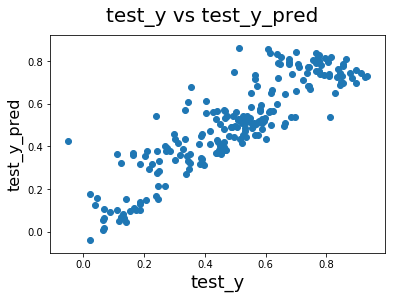

In [82]:
# Code to plot the scatter plot between the actual and predicted values
fig = plt.figure()
plt.scatter(test_y, test_y_pred)
fig.suptitle('test_y vs test_y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('test_y', fontsize = 18)                          # X-label
plt.ylabel('test_y_pred', fontsize = 16) 

From the above plot we see that actual and the predicted values follow a linear distribution. Hence the model seems to fit the test data also.

 We now move onto the *Statistical Evaluation*

### Statistical Evaluation

In [83]:
display("R2-Squared value of the train data is: "+ str(r2_score(train_y, y_train_pred)))
display("R2-Squared value of the test data is: "+ str(r2_score(test_y, test_y_pred)))

'R2-Squared value of the train data is: 0.7825154798858431'

'R2-Squared value of the test data is: 0.766202294611855'

## Final Model
From the above analysis the difference between the *Train R-Squared value* and the *Test R-Squared Value* is just 1.6 points. This is comparable and **hence the final model generalizes well for the test data as well. We will finalze lr_model_final as our final model**.

## Final Equation and Interpretation

The equation of the best fitted line is:
cnt = 0.192401 + 0.259882*yr + 0.437302*atemp - 0.170985*spring - 0.227425*Light

### Interpretation
- We see that for every 1 unit raise in year, cnt increases by 0.26 units while keeping the rest of the parameters constant.
- Similarly, for every 1 unit raise in atemp, cnt increases by 0.44 units while keeping the rest of the parameters constant.
- During the presence of spring, cnt decreases by 0.17 units while keeping the rest of the parameters constant.
- When the weather is slighlty rainy or snowy, cnt decreases by 0.17 units while keeping the rest of the parameters constant.

## Recommendation
After interpriting our linear regression equation, we see that there are 4 major factors that affect the rental count:
- **Temperature as felt by the customers**
- **Every passing year**
- **Season**
- **Weather situation**

Below are some of the recommendations after analyzing the linear regression model and the EDA:
- ***Temperature felt by the customers*** has a ***positive correlation*** with the sales of bike. Hence it would be beneficial to release some offers while the temperatures are low so that the customers are motivated to rent a bike.
- We see that with every ***passing year, the rental number increases***. Hence the sales are increasing on a yearly basis.
- We see that ***season*** has an impact on the bike sales. Specially, after analyzing the linear regression model and the EDA, we discovered that spring and winter season result in lower cusotmers renting bikes. The company needs to focus on this aspect.
- ***Weather situation*** also has a serious impact on the rentals. We see that while the weather is clear and sunny, cusotmers tend to rent more compared to on a gloomy, rainy or snowy day. Hence the company needs to attarct customers to use the bikes during such weather situations by either modifying the bikes to make the bikes more ridable during such unpleasent conditions.